In [34]:
import os

from scipy import stats
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import yaml
try:
    from yaml import CLoader as Loader
except ImportErorr:
    from yaml import Loader

In [35]:
# Set plot size
factor = 1.2
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*factor

In [36]:
# Folder for data files
data_dir = "data"
# Config file name
cfg_name = "config.yaml"
# Data file name
data_name = "sps3.csv"

In [37]:
data_path = os.path.join(data_dir, data_name)
cfg_path = os.path.join(data_dir, cfg_name)

# Read config
with open(cfg_path, "r") as f:
    cfg = yaml.load(f, Loader=Loader)
    
# Read data
data = pd.read_csv(data_path)

data["I_in"] = data["I_in"] * 1e6
data["I_meas"] = data["V_i"] / cfg["r_sense"] / cfg["gain"] * 1e6
data["V_meas"] = data["V_2x"] / 2.

data

,V_in,I_in,V_i,V_2x,I_meas,V_meas
0,0.000934,10.24036,0.005724,0.009636,2.298795,0.004818
1,0.001974,10.64747,0.006760,0.011654,2.714859,0.005827
2,0.002969,11.05400,0.007851,0.013712,3.153012,0.006856
3,0.003972,11.46050,0.008770,0.015723,3.522088,0.007862
4,0.004970,11.86751,0.009805,0.017829,3.937751,0.008915
...,...,...,...,...,...,...
94,0.095044,48.51072,0.102134,0.197746,41.017671,0.098873
95,0.096047,48.91884,0.103036,0.199607,41.379920,0.099804
96,0.097050,49.32672,0.103890,0.201279,41.722892,0.100640
97,0.098049,49.73306,0.105175,0.203011,42.238956,0.101505


In [38]:
def plot_accuracy(x, y):
    """Plots a graph showing the accuracy of measurements y to ideal values x
    
    Parameters
    ----------
    x : Series
        True values
    y : Series
        Measured values
        
    Returns
    -------
    fig, ax
        Matplotlib figure, same format as plt.subplots
    """
    
    fig, ax = plt.subplots()
    ax.plot(x, y / x)
    ax.axhline(y=1, linestyle=':', color='k', linewidth='3')
    ax.grid()
    
    return (fig, ax)

Text(0, 0.5, 'Relative Measurement (V/V)')

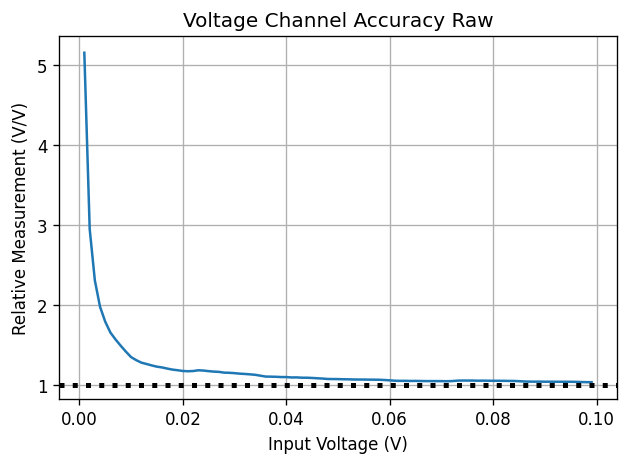

In [39]:
fig, ax = plot_accuracy(data["V_in"], data["V_meas"])

ax.set_title("Voltage Channel Accuracy Raw")
ax.set_xlabel("Input Voltage (V)")
ax.set_ylabel("Relative Measurement (V/V)")

Text(0, 0.5, 'Relative Measurement (A/A)')

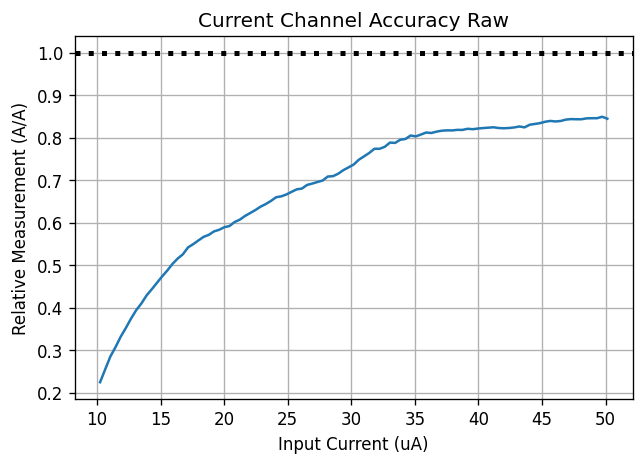

In [40]:
fig, ax = plot_accuracy(data["I_in"], data["I_meas"])

ax.set_title("Current Channel Accuracy Raw")
ax.set_xlabel("Input Current (uA)")
ax.set_ylabel("Relative Measurement (A/A)")

In [41]:
def calc_fit(x, y):
    """Calculates linear regression fit line given input x and output y.
    
    Parameters
    ----------
    x : Series
        input
    y : Series
        output
        
    Returns
    -------
    Series
        Fit line
    """
    
    linreg = stats.linregress(x, y)
    fit = linreg.intercept + x * linreg.slope
    return fit

In [42]:
# Linear Regression
data["V_fit"] = calc_fit(data["V_meas"], data["V_in"])
data["I_fit"] = calc_fit(data["I_meas"], data["I_in"])

Text(0, 0.5, 'Relative Measurement (V/V)')

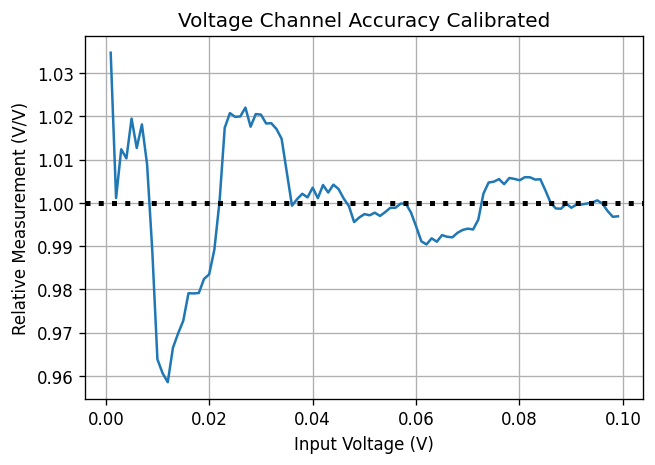

In [43]:
fig, ax = plot_accuracy(data["V_in"], data["V_fit"])

ax.set_title("Voltage Channel Accuracy Calibrated")
ax.set_xlabel("Input Voltage (V)")
ax.set_ylabel("Relative Measurement (V/V)")

Text(0, 0.5, 'Relative Measurement (A/A)')

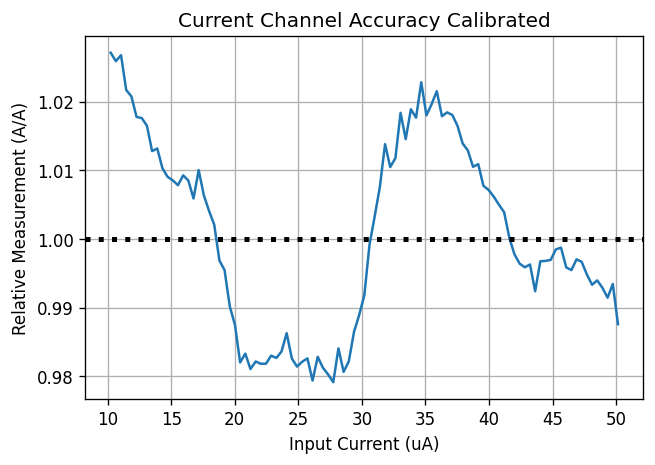

In [46]:
fig, ax = plot_accuracy(data["I_in"], data["I_fit"])

ax.set_title("Current Channel Accuracy Calibrated")
ax.set_xlabel("Input Current (uA)")
ax.set_ylabel("Relative Measurement (A/A)")